# Predicting Buying Session - Modeling

## Init

In [49]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns

In [50]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [51]:
df = pd.read_csv('online_shoppers_intention.csv')

In [52]:
num_feats = ['Administrative', 'Administrative_Duration', 'Informational', 
             'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
             'BounceRates', 'ExitRates', 'PageValues']

In [53]:
obj_feats = ['Month', 'OperatingSystems', 'Browser', 'Region',
             'TrafficType', 'VisitorType']
df[obj_feats] = df[obj_feats].astype('object')

cat_feats = ['Month', 'OperatingSystems', 'Browser', 'Region',
             'TrafficType', 'VisitorType', 'Weekend']

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

In [55]:
df = df[['Revenue', 'Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend']]

In [56]:
df.columns

Index(['Revenue', 'Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

## Preprocessing

In [57]:
onehot = OneHotEncoder()
for feat in ['Month', 'OperatingSystems', 'Browser', 'Region',
             'TrafficType', 'VisitorType']:
    onehotvalue = onehot.fit_transform(df[feat].values.reshape(-1,1)).toarray()
    onehotcols = pd.DataFrame(onehotvalue, columns = [
        feat + '_' + str(onehot.categories_[0][i])
        for i in range(len(onehot.categories_[0]))
    ])
    df = pd.concat([df, onehotcols], axis = 1)
    print(f'{feat} encoded')
    df = df.drop(columns=feat)

Month encoded
OperatingSystems encoded
Browser encoded
Region encoded
TrafficType encoded
VisitorType encoded


In [58]:
label_encoder = LabelEncoder()
for column in ['Weekend', 'Revenue']:
    df[column] = label_encoder.fit_transform(df[column])
    print({index: label for index, label in enumerate(label_encoder.classes_)})
    print(f'{column} encoded')

{0: False, 1: True}
Weekend encoded
{0: False, 1: True}
Revenue encoded


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 75 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Revenue                        12330 non-null  int32  
 1   Administrative                 12330 non-null  int64  
 2   Administrative_Duration        12330 non-null  float64
 3   Informational                  12330 non-null  int64  
 4   Informational_Duration         12330 non-null  float64
 5   ProductRelated                 12330 non-null  int64  
 6   ProductRelated_Duration        12330 non-null  float64
 7   BounceRates                    12330 non-null  float64
 8   ExitRates                      12330 non-null  float64
 9   PageValues                     12330 non-null  float64
 10  SpecialDay                     12330 non-null  float64
 11  Weekend                        12330 non-null  int32  
 12  Month_Aug                      12330 non-null 

## Unscaled

In [ ]:
df.iloc[:,:-1]

In [ ]:
X = df.iloc[:,:17]
y = df.iloc[0, :]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    random_state = 8)

for data in [x_train, x_test, y_train, y_test]:
    print(data.shape)

## Spot Check Classification Algorithms

Due to imbalanced classes, with BUY class as minority, classifiers did not perform well to predict the event (precision and recall averaging as low as 50%)<br>
Sakar (2018) used oversampling to mitigate this problem and improves metrics to 80% range

Error to focus on --> Customers that we thought would buy but actually did not buy --> False positive (FP) --> Lost revenue <br>
This is the conservative take, for follow-up action we also can devise incentives to purchase<br>
Instead of customers that we thought would NOT buy but actually did buy --> that's good news, nothing to worry about<br>

__Clustering possible to study types of customers that would/would not buy?__

### LogReg

Train score: 84.73%
Test score: 83.78%
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91      2066
         1.0       0.00      0.00      0.00       400

    accuracy                           0.84      2466
   macro avg       0.42      0.50      0.46      2466
weighted avg       0.70      0.84      0.76      2466



C:\Users\gabri\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


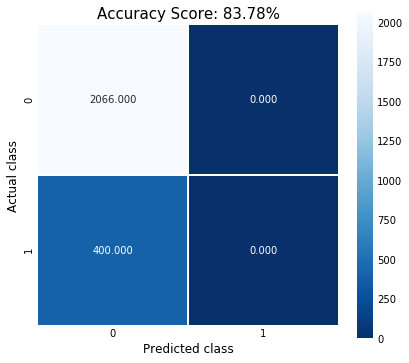

In [61]:
# LOGISTIC REGRESSION
classifier = LogisticRegression(solver='newton-cg')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# METRICS
print(f'Train score: {round(classifier.score(x_train, y_train)*100, 2)}%')
print(f'Test score: {round(classifier.score(x_test, y_test)*100, 2)}%\n')

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
all_sample_title = 'Test Confusion Matrix')
plt.title(all_sample_title, size = 15)
plt.show()

### Naive Bayes

Train score: 54.14%
Test score: 53.61%
              precision    recall  f1-score   support

         0.0       0.98      0.45      0.62      2066
         1.0       0.25      0.96      0.40       400

    accuracy                           0.54      2466
   macro avg       0.62      0.71      0.51      2466
weighted avg       0.86      0.54      0.59      2466



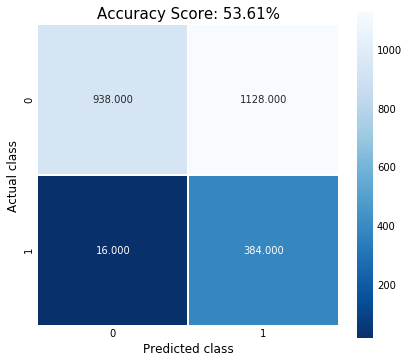

In [62]:
# NAIVE BAYES
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# METRICS
print(f'Train score: {round(classifier.score(x_train, y_train)*100, 2)}%')
print(f'Test score: {round(classifier.score(x_test, y_test)*100, 2)}%')

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = f'{round(accuracy*100, 2)}%'

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_percentage)
plt.title(all_sample_title, size = 15)
plt.show()

### DT

Train score: 98.81%
Test score: 77.45%
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      2066
         1.0       0.32      0.34      0.33       400

    accuracy                           0.77      2466
   macro avg       0.59      0.60      0.60      2466
weighted avg       0.78      0.77      0.78      2466



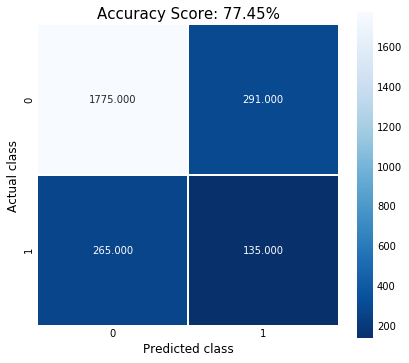

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.531828 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.531828 to fit



In [63]:
# DECISION TREE
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# METRICS
print(f'Train score: {round(classifier.score(x_train, y_train)*100, 2)}%')
print(f'Test score: {round(classifier.score(x_test, y_test)*100, 2)}%')

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = f'{round(accuracy*100, 2)}%'

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_percentage)
plt.title(all_sample_title, size = 15)
plt.show()

# VISUALIZE TREE
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = x_train.columns, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DT Purchase.png')
Image(graph.create_png())

### RF

Train score: 98.81%
Test score: 82.6%
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.90      2066
         1.0       0.36      0.10      0.15       400

    accuracy                           0.83      2466
   macro avg       0.61      0.53      0.53      2466
weighted avg       0.77      0.83      0.78      2466



Text(0.5, 1, 'Accuracy Score: 82.6%')

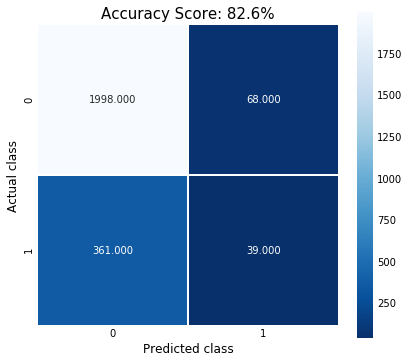

In [64]:
# RANDOM FOREST
classifier = RandomForestClassifier(n_estimators=100, 
                                    max_depth=50, 
                                    min_samples_leaf=1, 
                                    min_samples_split=2)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# METRICS
print(f'Train score: {round(classifier.score(x_train, y_train)*100, 2)}%')
print(f'Test score: {round(classifier.score(x_test, y_test)*100, 2)}%')

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = f'{round(accuracy*100, 2)}%'

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_percentage)
plt.title(all_sample_title, size = 15)

### SVM

In [ ]:
# SUPPORT VECTOR MACHINES
classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# METRICS
print(f'Train score: {round(classifier.score(x_train, y_train)*100, 2)}%')
print(f'Test score: {round(classifier.score(x_test, y_test)*100, 2)}%')

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = f'{round(accuracy*100, 2)}%'

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_percentage)
plt.title(all_sample_title, size = 15)

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder, RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

df = pd.read_csv('C:/Users/lenovo/Downloads/my notebook/online_shoppers_intention.csv')

df.shape

df.head()

df.info()

sns.countplot(df['Revenue'])

df['Revenue'].value_counts().apply(lambda x: str(round(x/df['Revenue'].value_counts().sum()*100, 2))+'%')

This dataset is imbalanced, class label 'True': 'False' = 16:84 <br>
"Imbalanced Classification: A classification predictive modeling problem where the distribution of examples across the classes is not equal." [https://machinelearningmastery.com/what-is-imbalanced-classification/]<br>
'This class imbalance
problem is a natural situation for the analyzed problem
since most of the e-commerce visits do not end with
shopping. Therefore, alternative metrics that take the
class imbalanced into account such as F1 Score should be
used to evaluate the performance of the classifiers." - Sakar, 2018

* 'True' --> Minority class
* 'False' --> Majority class

###### The class or classes with abundant examples are called the major or majority classes, whereas the class with few examples (and there is typically just one) is called the minor or minority class.<br>

* Majority Class: The class (or classes) in an imbalanced classification predictive modeling problem that has many examples.
* Minority Class: The class in an imbalanced classification predictive modeling problem that has few examples.

###### When working with an imbalanced classification problem, the minority class is typically of the most interest. This means that a model’s skill in correctly predicting the class label or probability for the minority class is more important than the majority class or classes.

for column in cat_feats:
    sns.countplot(df[column])
    plt.show()

What is exactly VisitorType='Other'? Consider deleting these records, Google Analytics only has Returning/New Visitors<br>
To prevent overfitting, we can consider combining sparse classes @ OperatingSystems, Browser, TrafficType.

df['Month'].value_counts().apply(lambda x: str(round(x/df['Month'].value_counts().sum()*100, 2))+'%')

df['OperatingSystems'].value_counts().apply(lambda x: str(round(x/df['OperatingSystems'].value_counts().sum()*100, 2))+'%')

df['Browser'].value_counts().apply(lambda x: str(round(x/df['Browser'].value_counts().sum()*100, 2))+'%')

df['Region'].value_counts().apply(lambda x: str(round(x/df['Region'].value_counts().sum()*100, 2))+'%')

df['TrafficType'].value_counts().apply(lambda x: str(round(x/df['TrafficType'].value_counts().sum()*100, 2))+'%')

df['VisitorType'].value_counts().apply(lambda x: str(round(x/df['VisitorType'].value_counts().sum()*100, 2))+'%')

df[df['VisitorType']=='Other']['Revenue'].value_counts()

sns.pairplot(df[num_feats])

corr = df.corr('pearson')
fig, ax = plt.subplots(figsize=(12, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

Administrative/Informational/ProductRelated pageview <--> its counterpart duration is HIGHLY correlated (60% - 86%)<br>
To reduce features + solve autocorrelation, consider creating interaction variable as below?
* Administrative = Administrative * Administrative_Duration
* Informational = Informational * Administrative_Duration
* ProductRelated = ProductRelated * Administrative_Duration
which is a sum of information contained in both variable.<br>


<br>
Also note: ExitRates <--> BounceRates (90%!)


<br>
It's natural for PageValues to be correlated to Revenue (49%), since visitor will visit billing pages before purchase

df.groupby('Revenue').agg('mean')[num_feats]

df.groupby('TrafficType').agg('mean')[[
    'BounceRates', 'ExitRates', 'PageValues']].sort_values(by='BounceRates', ascending=False)

traffic_conversion = pd.crosstab(df.TrafficType, 
                            df.Revenue,
                            margins=True, 
                            margins_name="Total"
)
traffic_conversion['ConversionRate (%)'] = round(traffic_conversion[True]/traffic_conversion['Total']*100, 2)
traffic_conversion.sort_values(by='ConversionRate (%)', ascending=False)

pd.crosstab(df.TrafficType, 
            df.Revenue,
            values=df.PageValues,
            aggfunc='median'
#             margins=True, 
#             margins_name="Total"
           ).round(2).sort_values(by=True, ascending=False)

fig = px.scatter(df, x="Administrative_Duration", y="Administrative", color="Revenue")
fig.show()

fig = px.scatter(df, x="Informational_Duration", y="Informational", color="Revenue")
fig.show()

fig = px.scatter(df, x="ProductRelated_Duration", y="ProductRelated", color="Revenue")
fig.show()

fig = px.scatter(df, x="BounceRates", y="ExitRates", color="Revenue")
fig.show()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y=[i for i in df[df['Revenue']==True]['Month'].value_counts().reindex(months).values],
    name='Purchased',
    marker_color='mediumvioletred'
))
fig.add_trace(go.Bar(
    x=months,
    y=[i for i in df[df['Revenue']==False]['Month'].value_counts().reindex(months).values],
    name='Did not purchase',
    marker_color='slategrey'
))

# # Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                 title='Number of Transactions by Month',
                   xaxis_title='Month',
                   yaxis_title='Number of Transactions')
fig.show()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=months, 
                         y=[i for i in df[df['Revenue']==True]['Month'].value_counts().reindex(months).values], 
                         name = 'Purchased',
                         line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=months, 
                         y=[i for i in df[df['Revenue']==False]['Month'].value_counts().reindex(months).values], 
                         name='Did not purchase',
                         line=dict(color='firebrick', width=4) # dash options include 'dash', 'dot', and 'dashdot'
))

# Edit the layout
fig.update_layout(title='Line Chart',
                   xaxis_title='Month',
                   yaxis_title='Number of Transactions')


fig.show()

regions=df["Region"].value_counts()

# pie plot
fig = px.pie(regions,
             values=regions.values,
             names=regions.index,
             title="From what regions do visitors come from?",
             color_discrete_sequence=px.colors.diverging.curl)
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

rev_true_labels = [i for i in df[df['Revenue']==True]['TrafficType'].value_counts().sort_index().index]
rev_true_values = [i for i in df[df['Revenue']==True]['TrafficType'].value_counts().sort_index().values]
rev_false_labels = [i for i in df[df['Revenue']==False]['TrafficType'].value_counts().sort_index().index]
rev_false_values = [i for i in df[df['Revenue']==False]['TrafficType'].value_counts().sort_index().values]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, 
                    cols=2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Purchased', 'Did not purchase']
                   )
fig.add_trace(go.Pie(labels=rev_true_labels, 
                     values=rev_true_values, 
                     name="1", 
                     scalegroup='one',
                    ),
              1, 1
             )
fig.add_trace(go.Pie(labels=rev_false_labels, 
                     values=rev_false_values, 
                     name="0", 
                     scalegroup='one'),
              1, 2
             )

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="From which channels do visitors come from?",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='', x=0.18, y=0.5, font_size=10, showarrow=False),
                 dict(text='', x=0.82, y=0.5, font_size=10, showarrow=False)])
fig.show()

visitors=df['VisitorType'].value_counts()

# pie plot
fig = px.pie(visitors,
             values=visitors.values,
             names=visitors.index,
             title="What's the composition of our visitors?",
             color_discrete_sequence=px.colors.diverging.Portland)
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

visitors=[i for i in df['VisitorType'].unique()]

fig = go.Figure(data=[
    go.Bar(name='Purchased', 
           x=visitors, 
           y=[i for i in df[df['Revenue']==True]['VisitorType'].value_counts().reindex(visitors).values], 
           marker_color='mediumvioletred'
          ),
    go.Bar(name='Did not purchase', 
           x=visitors, 
           y=[i for i in df[df['Revenue']==False]['VisitorType'].value_counts().reindex(visitors).values], 
           marker_color='slategrey'),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

# visitors=[i for i in df['VisitorType'].unique()]

# fig = go.Figure()
# fig.add_trace(go.Bar(
#     y=visitors,
#     x=[i for i in df[df['Revenue']==True]['VisitorType'].value_counts().reindex(visitors).values],
#     name='Purchased',
#     orientation='h'
# ))
# fig.add_trace(go.Bar(
#     y=visitors,
#     x=[i for i in df[df['Revenue']==False]['VisitorType'].value_counts().reindex(visitors).values],
#     name='Did not purchase',
#     orientation='h'
# ))

# fig.update_layout(barmode='stack')
# fig.show()

weekend=[i for i in df['Weekend'].unique()]

fig = go.Figure(data=[
    go.Bar(name='Purchased', 
           x=weekend, 
           y=[i for i in df[df['Revenue']==True]['Weekend'].value_counts().reindex(weekend).values], 
           marker_color='mediumvioletred'
          ),
    go.Bar(name='Did not purchase', 
           x=weekend, 
           y=[i for i in df[df['Revenue']==False]['Weekend'].value_counts().reindex(weekend).values], 
           marker_color='slategrey'),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

## Preprocessing

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in ['Month', 'VisitorType', 'Weekend', 'Revenue']:
    df[column] = label_encoder.fit_transform(df[column])
    print({index: label for index, label in enumerate(label_encoder.classes_)})
    print(f'{column} encoded')

df.info()

X = df.iloc[:,:17]
y = df.iloc[:,17]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

for data in [x_train, x_test, y_train, y_test]:
    print(data.shape[0])

## Spot Check Classification Algorithms

Due to imbalanced classes, with BUY class as minority, classifiers did not perform well to predict the event (precision and recall averaging as low as 50%)<br>
Sakar (2018) used oversampling to mitigate this problem and improves metrics to 80% range

Error to focus on --> Customers that we thought would buy but actually did not buy --> False positive (FP) --> Lost revenue <br>
This is the conservative take, for follow-up action we also can devise incentives to purchase<br>
Instead of customers that we thought would NOT buy but actually did buy --> that's good news, nothing to worry about<br>

__Clustering possible to study types of customers that would/would not buy?__

### LogReg

# LOGISTIC REGRESSION
classifier = LogisticRegression(solver='newton-cg')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# METRICS
print(f'Train score: {round(classifier.score(x_train, y_train)*100, 2)}%')
print(f'Test score: {round(classifier.score(x_test, y_test)*100, 2)}%')

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = f'{round(accuracy*100, 2)}%'

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_percentage)
plt.title(all_sample_title, size = 15)
plt.show()

### Naive Bayes

# NAIVE BAYES
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# METRICS
print(f'Train score: {round(classifier.score(x_train, y_train)*100, 2)}%')
print(f'Test score: {round(classifier.score(x_test, y_test)*100, 2)}%')

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = f'{round(accuracy*100, 2)}%'

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_percentage)
plt.title(all_sample_title, size = 15)
plt.show()

### DT

# DECISION TREE
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# METRICS
print(f'Train score: {round(classifier.score(x_train, y_train)*100, 2)}%')
print(f'Test score: {round(classifier.score(x_test, y_test)*100, 2)}%')

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = f'{round(accuracy*100, 2)}%'

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_percentage)
plt.title(all_sample_title, size = 15)
plt.show()

# VISUALIZE TREE
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = x_train.columns, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DT Purchase.png')
Image(graph.create_png())

### RF

# RANDOM FOREST
classifier = RandomForestClassifier(n_estimators=100, 
                                    max_depth=50, 
                                    min_samples_leaf=1, 
                                    min_samples_split=2)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# METRICS
print(f'Train score: {round(classifier.score(x_train, y_train)*100, 2)}%')
print(f'Test score: {round(classifier.score(x_test, y_test)*100, 2)}%')

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = f'{round(accuracy*100, 2)}%'

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_percentage)
plt.title(all_sample_title, size = 15)

### SVM

# SUPPORT VECTOR MACHINES
classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# METRICS
print(f'Train score: {round(classifier.score(x_train, y_train)*100, 2)}%')
print(f'Test score: {round(classifier.score(x_test, y_test)*100, 2)}%')

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = f'{round(accuracy*100, 2)}%'

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_percentage)
plt.title(all_sample_title, size = 15)